In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Reading the dataset

In [3]:
df=pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


The dataset contains 13200 rows and 7 columns i.e; location,size,total_sqft,bath,price,bhk,price_per_sqft

# 1. Using mean method

In [4]:
df.price_per_sqft.mean()

7920.336742424242

In [5]:
df.price_per_sqft.median()

5438.0

There is a significant difference in mean and median indicating the presence of outliers

<Axes: xlabel='price_per_sqft', ylabel='Count'>

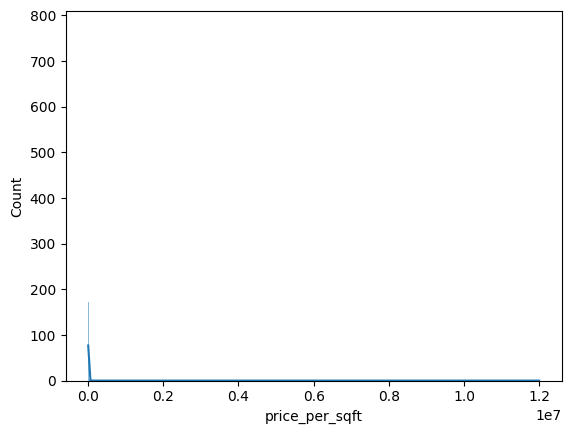

In [6]:
sns.histplot(data=df,x=df.price_per_sqft,kde=True)

In [7]:
import scipy
from scipy.stats import skew,kurtosis


In [8]:
df.price_per_sqft.skew()

108.28105529705168

In [9]:
kurtosis(df['price_per_sqft'],fisher=False)

12093.633538860382

Skewness and curtosis values are not within the range indicating the presence of outliers

# 2. Using percentile method to detect outilers 

#### Replacing a value in price_per_sqft using null

In [10]:
import numpy as np
df.loc[6599,"price_per_sqft"]=np.nan
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.0
13196,other,4 BHK,3600.0,5.0,400.00,4,11111.0
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.0
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.0


In [11]:
df.price_per_sqft.quantile([0.25,0.35,0.45,0.50,0.60,0.75,0.80,0.85,0.90])

0.25     4267.0
0.35     4734.3
0.45     5176.0
0.50     5438.0
0.60     6000.0
0.75     7317.0
0.80     8019.4
0.85     9334.8
0.90    11666.0
Name: price_per_sqft, dtype: float64

There is a significant change in 85th and 90th quantile indicating the presence of outliers

#### Displaying the rows containing outliers

In [12]:
df[df.price_per_sqft>df.price_per_sqft.quantile(0.85)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181.0
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.0
11,Whitefield,4 Bedroom,2785.0,5.0,295.0,4,10592.0
18,other,3 BHK,2770.0,4.0,290.0,3,10469.0
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571.0
...,...,...,...,...,...,...,...
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000.0
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083.0
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666.0
13196,other,4 BHK,3600.0,5.0,400.0,4,11111.0


There are 1980 rows containing outlier values

#### Replacing null value

In [13]:
df1=df.fillna(df.price_per_sqft.median())
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.0
13196,other,4 BHK,3600.0,5.0,400.00,4,11111.0
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.0
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.0


Since there are outliers we cannot replace the null value with mean, so replacing the null value with median value 

#### Using the quantile function after replacing null value

In [14]:
df1.price_per_sqft.quantile([0.25,0.45,0.50,0.75,0.80,0.81,0.82,0.83,0.84,0.85,0.90])

0.25     4267.00
0.45     5176.00
0.50     5438.00
0.75     7317.00
0.80     8019.20
0.81     8223.38
0.82     8428.00
0.83     8695.00
0.84     9000.00
0.85     9333.90
0.90    11666.00
Name: price_per_sqft, dtype: float64

#### Removing the outlier

In [15]:
dfno1=df1[df1.price_per_sqft < df1.price_per_sqft.quantile(0.85)]
dfno1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0
...,...,...,...,...,...,...,...
13193,Uttarahalli,3 BHK,1345.0,2.0,57.00,3,4237.0
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530.0
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.0
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.0


Since there is a significant change after 85th quantile, we can consider the values present after 85th quantile aas outliers. So we can remove them from the dataset

The remaining dataset is displayed above

#### Calculating mean and median 

In [16]:
dfno1.price_per_sqft.mean()

5260.598841354724

In [17]:
dfno1.price_per_sqft.median()

5033.0

<Axes: xlabel='price_per_sqft', ylabel='Count'>

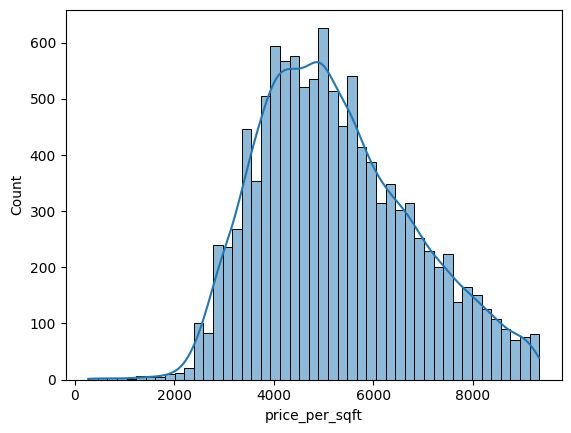

In [18]:
sns.histplot(data=dfno1,x=dfno1.price_per_sqft,kde=True)

In [19]:
dfno1.price_per_sqft.skew()

0.4445926227892694

In [20]:
kurtosis(dfno1['price_per_sqft'],fisher=False)

2.6714778790398834

Here skewness is close to 0.5 and kurtosis is close to 3 . So we've obtained a plot which is almost a normally distributed curve

Mean and median values are almost the same which means the outliers are removed

# 3. IQR

#### Calculating q1 , q3 , IQR

In [21]:
q1 = df.price_per_sqft.quantile(0.25)
print("q1 =",q1)

q1 = 4267.0


In [22]:
q3 = df.price_per_sqft.quantile(0.75)
print("q3 =",q3)

q3 = 7317.0


In [23]:
iqr= q3-q1
print("iqr =",iqr)

iqr = 3050.0


#### Calculating lower whisker and upper whisker

In [24]:
lower_whisker = q1 - 1.5*iqr
print("lower_whisker =",lower_whisker)

lower_whisker = -308.0


In [25]:
upper_whisker = q3 + 1.5*iqr
print("upper_whisker =",upper_whisker)

upper_whisker = 11892.0


#### Detecting outliers

In [26]:
df1[(df1.price_per_sqft<308.0)|(df1.price_per_sqft>11892.0)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181.0
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.0
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571.0
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.0
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250.0
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228.0
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571.0
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000.0
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083.0


Values which occur before lower whisker and after upper whisker are considered outliers

#### Removing outliers

In [27]:
df_no2=df1[(df1.price_per_sqft>308.0)&(df1.price_per_sqft<11892.0)]
df_no2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.0
13196,other,4 BHK,3600.0,5.0,400.00,4,11111.0
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.0
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.0


#### Calculating mean and median 

In [28]:
df_no2.price_per_sqft.mean()

5576.381766381766

In [29]:
df_no2.price_per_sqft.median()

5188.0

<Axes: xlabel='price_per_sqft', ylabel='Count'>

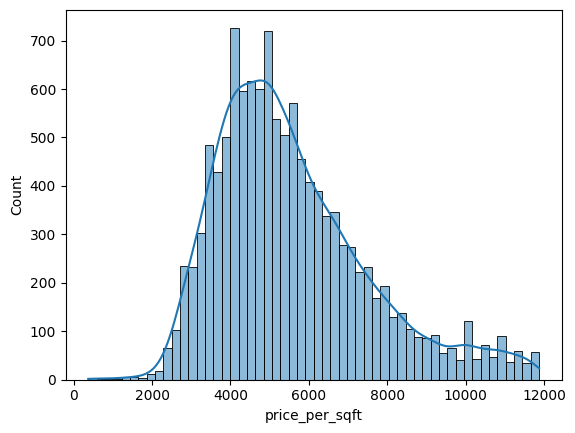

In [30]:
sns.histplot(data=df_no2,x=df_no2.price_per_sqft,kde=True)

In [31]:
df_no2.price_per_sqft.skew()

0.946501367329865

In [32]:
kurtosis(df_no2['price_per_sqft'],fisher=False)

3.677258729171694

Since mean and median are almost the same , it indicates that outliers are removed. Also after plotting the new dataset the graph obtained is almost similar to normally distributed curve with skewness less than 1 and kurtosis close to 3

# 4. Normal Distribution

#### Normal distribution curve(histplot)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

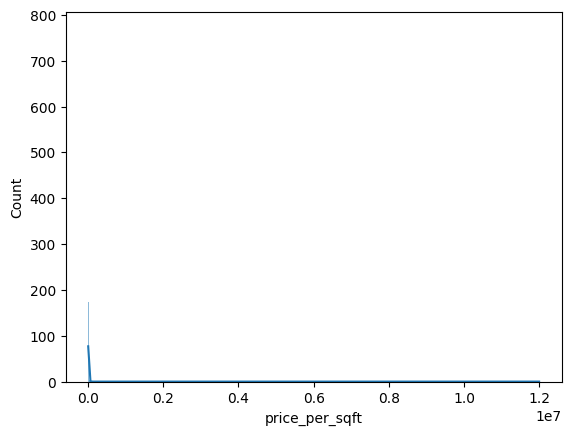

In [33]:
sns.histplot(data=df,x=df.price_per_sqft,kde=True)

In [34]:
mean=df.price_per_sqft.mean()
mean

7920.535116296689

In [35]:
std=df.price_per_sqft.std()
std

106731.20112598252

In [36]:
neg_sigma=mean-3*std
neg_sigma

-312273.0682616509

In [37]:
pos_sigma=mean+3*std
pos_sigma

328114.13849424425

Calculated -3sigma and +3sigma values. Values that comes outside this range is considered outliers. Given below is the dataset after removing outliers

#### Removing outliers

In [38]:
dfno3=df[(df.price_per_sqft>neg_sigma)&(df.price_per_sqft<pos_sigma)]
dfno3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.0
13196,other,4 BHK,3600.0,5.0,400.00,4,11111.0
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.0
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.0


<Axes: xlabel='price_per_sqft', ylabel='Count'>

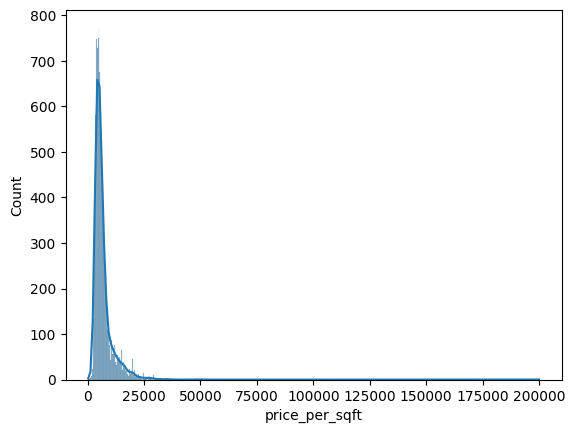

In [39]:
sns.histplot(data=dfno3,x=dfno3.price_per_sqft,kde=True)

In [40]:
dfno3.price_per_sqft.skew()

10.47744744483345

In [41]:
kurtosis(dfno3["price_per_sqft"],fisher=False)

316.5064772211868

##### Sice skewness and kurtosis didnt come in the desired range we can use the logrithamic transformation of the column price_per_sqft

<Axes: xlabel='price_per_sqft', ylabel='Count'>

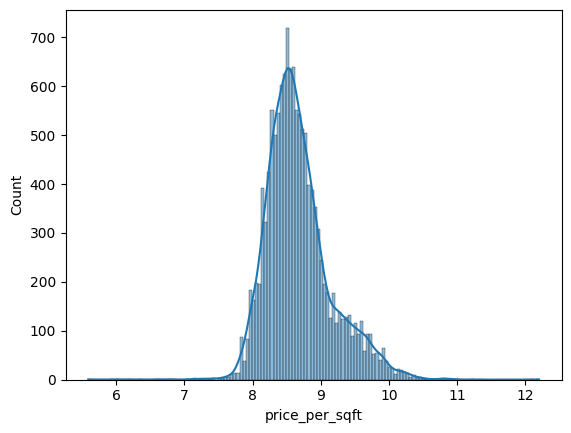

In [42]:
sns.histplot(data=dfno3,x=np.log(dfno3.price_per_sqft),kde=True)

In [43]:
np.log(dfno3.price_per_sqft.skew())

2.3492250848019753

In [44]:
kurtosis(np.log(dfno3["price_per_sqft"]),fisher=False)

4.911834565911293

Here we obtained a plot with skewness greater than 1 and kurtosis greater than 3(leptokurtic curve)

## 5. Z-score

In [45]:
df["Zscore_pps"]=(df.price_per_sqft-mean)/std
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore_pps
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.0,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.0,-0.030971
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.0,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.0,-0.015699
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.0,-0.011539
13196,other,4 BHK,3600.0,5.0,400.00,4,11111.0,0.029893
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.0,-0.024946
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.0,0.023297


#### Removing outliers using Z-score

In [46]:
dfno4=df[(df.Zscore_pps>-3)&(df.Zscore_pps<3)]
dfno4

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore_pps
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.0,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.0,-0.030971
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.0,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.0,-0.015699
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.0,-0.011539
13196,other,4 BHK,3600.0,5.0,400.00,4,11111.0,0.029893
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.0,-0.024946
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.0,0.023297


Removed 6 outliers. 13200 rows was reduced to 13194 rows

<Axes: xlabel='price_per_sqft', ylabel='Count'>

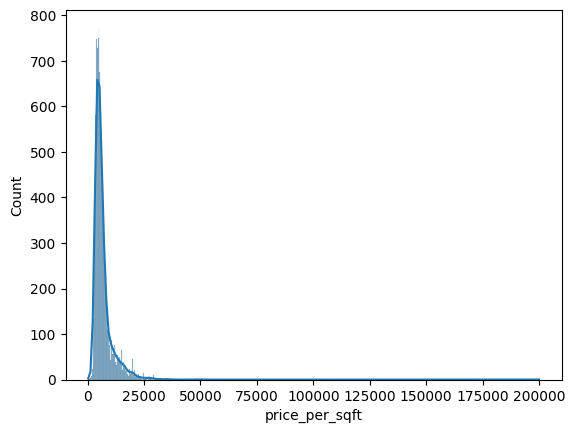

In [47]:
sns.histplot(data=dfno4,x=dfno4.price_per_sqft,kde=True)

In [48]:
dfno4.price_per_sqft.skew()

10.47744744483345

In [49]:
kurtosis(np.log(dfno3["price_per_sqft"]),fisher=False)

4.911834565911293

##### Since skewness and kurtosis are not in the preferred range we can use logarithmic transformation

<Axes: xlabel='price_per_sqft', ylabel='Count'>

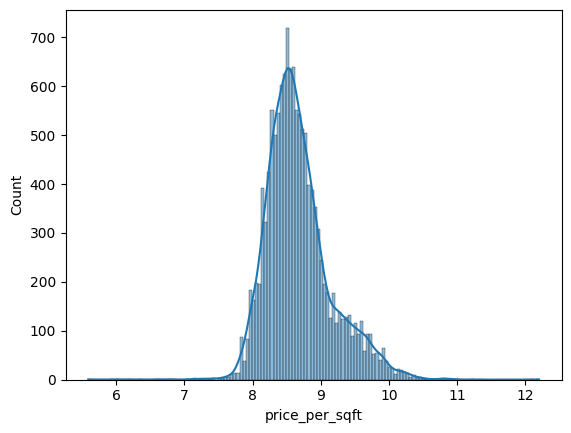

In [50]:
sns.histplot(data=dfno4,x=np.log(dfno4.price_per_sqft),kde=True)

In [51]:
np.log(dfno4.price_per_sqft).skew()

0.8737072796447191

In [52]:
kurtosis(np.log(dfno4["price_per_sqft"]),fisher=False)

4.911834565911293

After logarithmic transformation skewness has reduced to a value less than 1 but kurtosis value is greater than 3(leptokurtic curve)

## Correlation Matrix

In [53]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore_pps
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.0,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.0,-0.030971
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.0,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.0,-0.015699
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.0,-0.011539
13196,other,4 BHK,3600.0,5.0,400.00,4,11111.0,0.029893
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.0,-0.024946
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.0,0.023297


##### Drop non-numerical columns

In [54]:
df1=df.drop(["location","size","Zscore_pps"],axis=1)
df1

,total_sqft,bath,price,bhk,price_per_sqft
0,1056.0,2.0,39.07,2,3699.0
1,2600.0,5.0,120.00,4,4615.0
2,1440.0,2.0,62.00,3,4305.0
3,1521.0,3.0,95.00,3,6245.0
4,1200.0,2.0,51.00,2,4250.0
...,...,...,...,...,...
13195,3453.0,4.0,231.00,5,6689.0
13196,3600.0,5.0,400.00,4,11111.0
13197,1141.0,2.0,60.00,2,5258.0
13198,4689.0,4.0,488.00,4,10407.0


In [55]:
corr1=df1.corr()
corr1

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.392743,0.574330,0.346013,-0.008267
bath,0.392743,1.000000,0.455998,0.897951,0.030883
price,0.574330,0.455998,1.000000,0.396883,0.028387
bhk,0.346013,0.897951,0.396883,1.000000,0.030955
price_per_sqft,-0.008267,0.030883,0.028387,0.030955,1.000000


<Axes: >

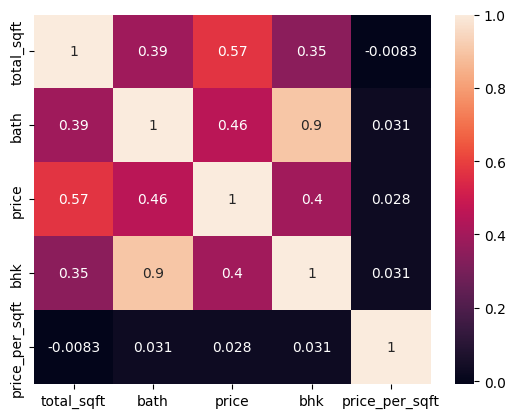

In [56]:
sns.heatmap(corr1,annot=True)

Calculated a correlation matrix and plotted a heat map for all the numerical columns and observed that the attributes "bath" and "bhk" are highly correlated with value of correlatio coefficient 0.9. And the attributes "price per sqft" and "total sqfl" are the least correlated with a negative correlation coefficient -0.0083.

## Scatter plot

In [57]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


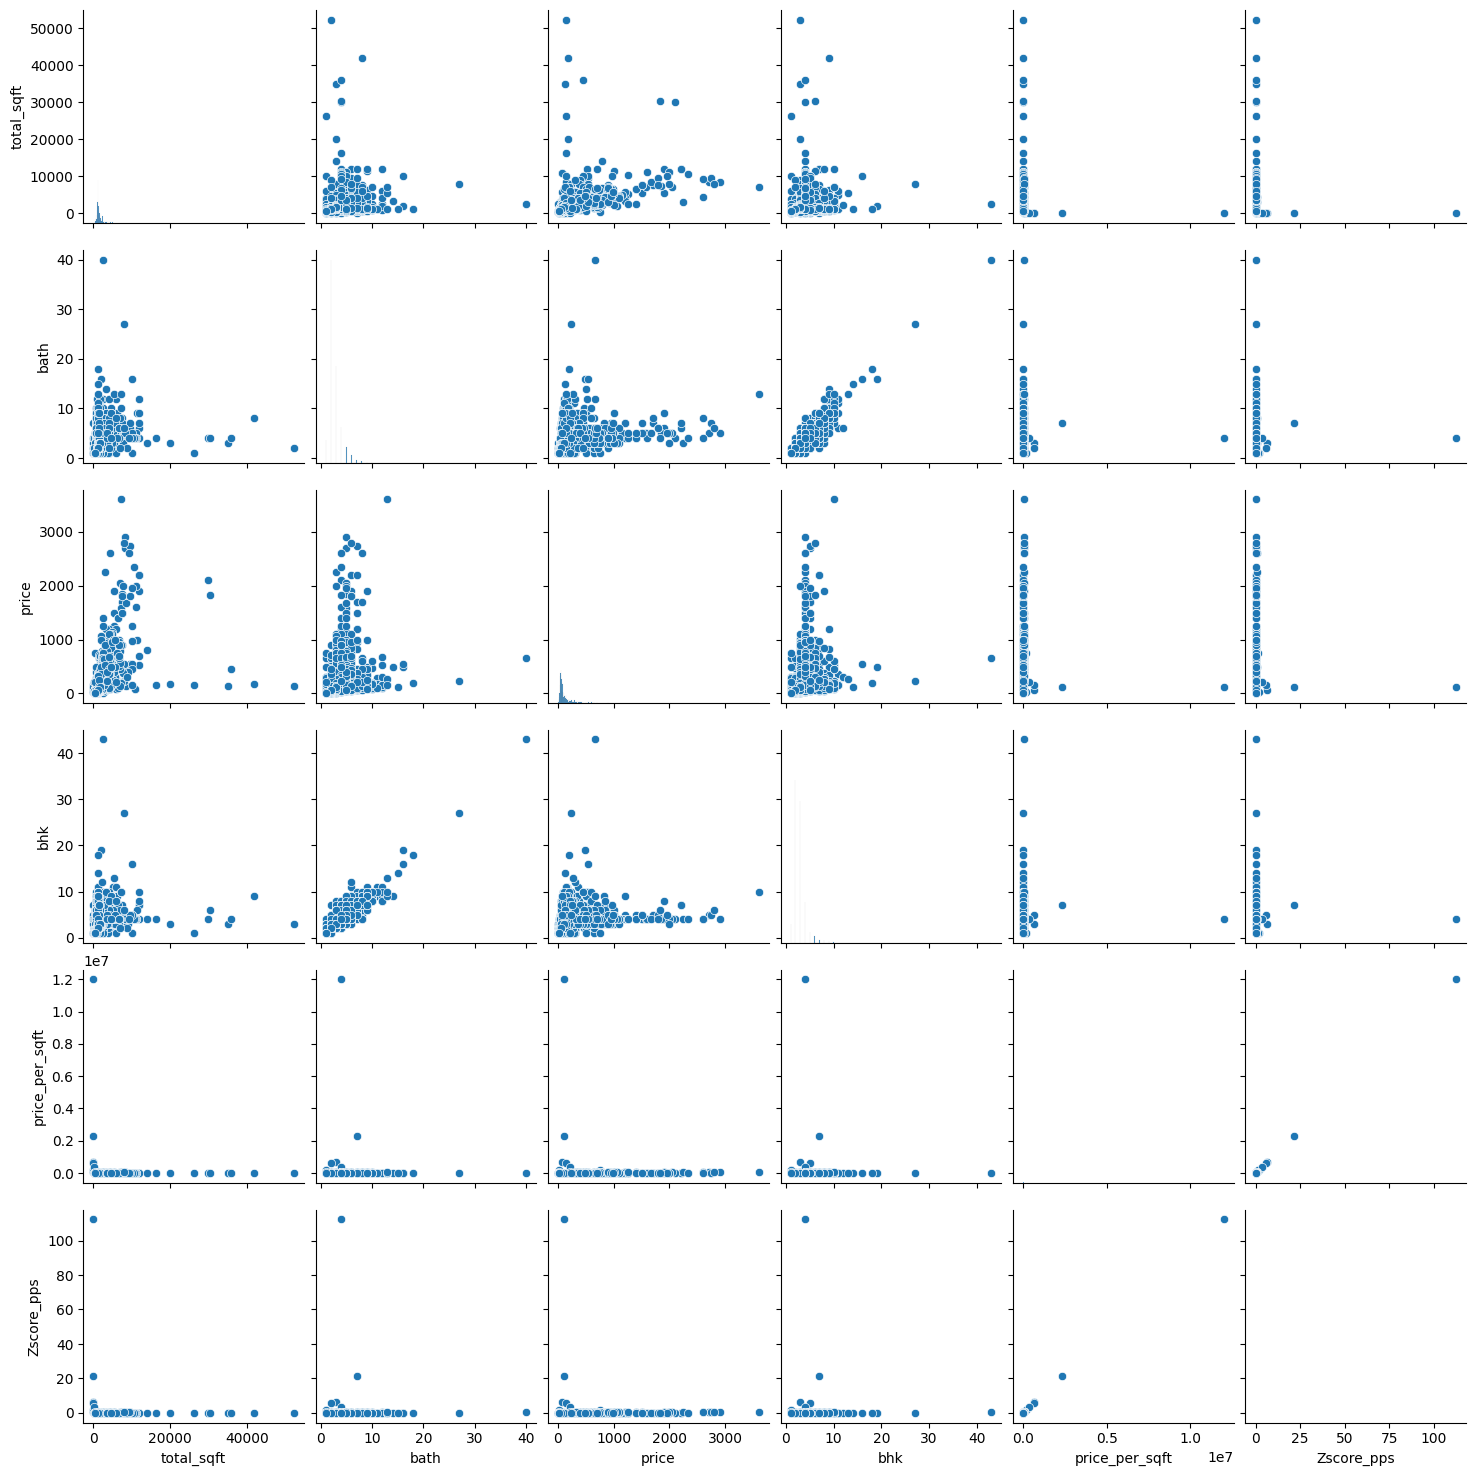

In [58]:
sns.pairplot(df)
plt.show()

## Box plot 

### Before outlier removal

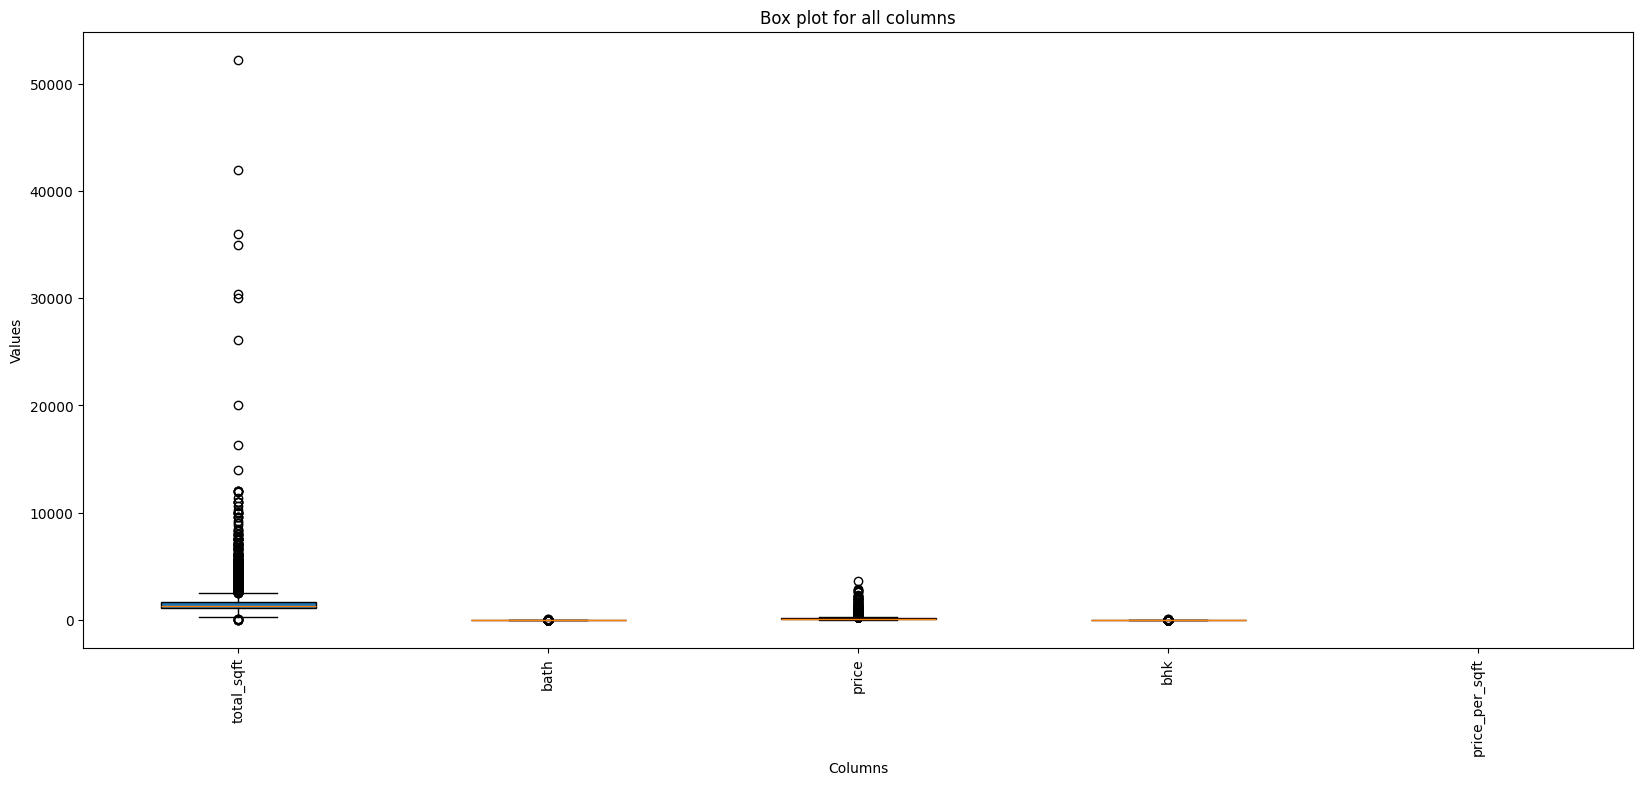

In [67]:
plt.figure(figsize=(20, 8))  # Adjust the figure size as needed
plt.title("Box plot for all columns")
plt.boxplot(df1.values, patch_artist=True, labels=df1.columns)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=90)  # Rotate column labels if they overlap
plt.show()

### Box plot after outlier removal

In [68]:
dfno1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0
...,...,...,...,...,...,...,...
13193,Uttarahalli,3 BHK,1345.0,2.0,57.00,3,4237.0
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530.0
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.0
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.0


In [70]:
dfb=dfno1.drop(["location","size"],axis=1)

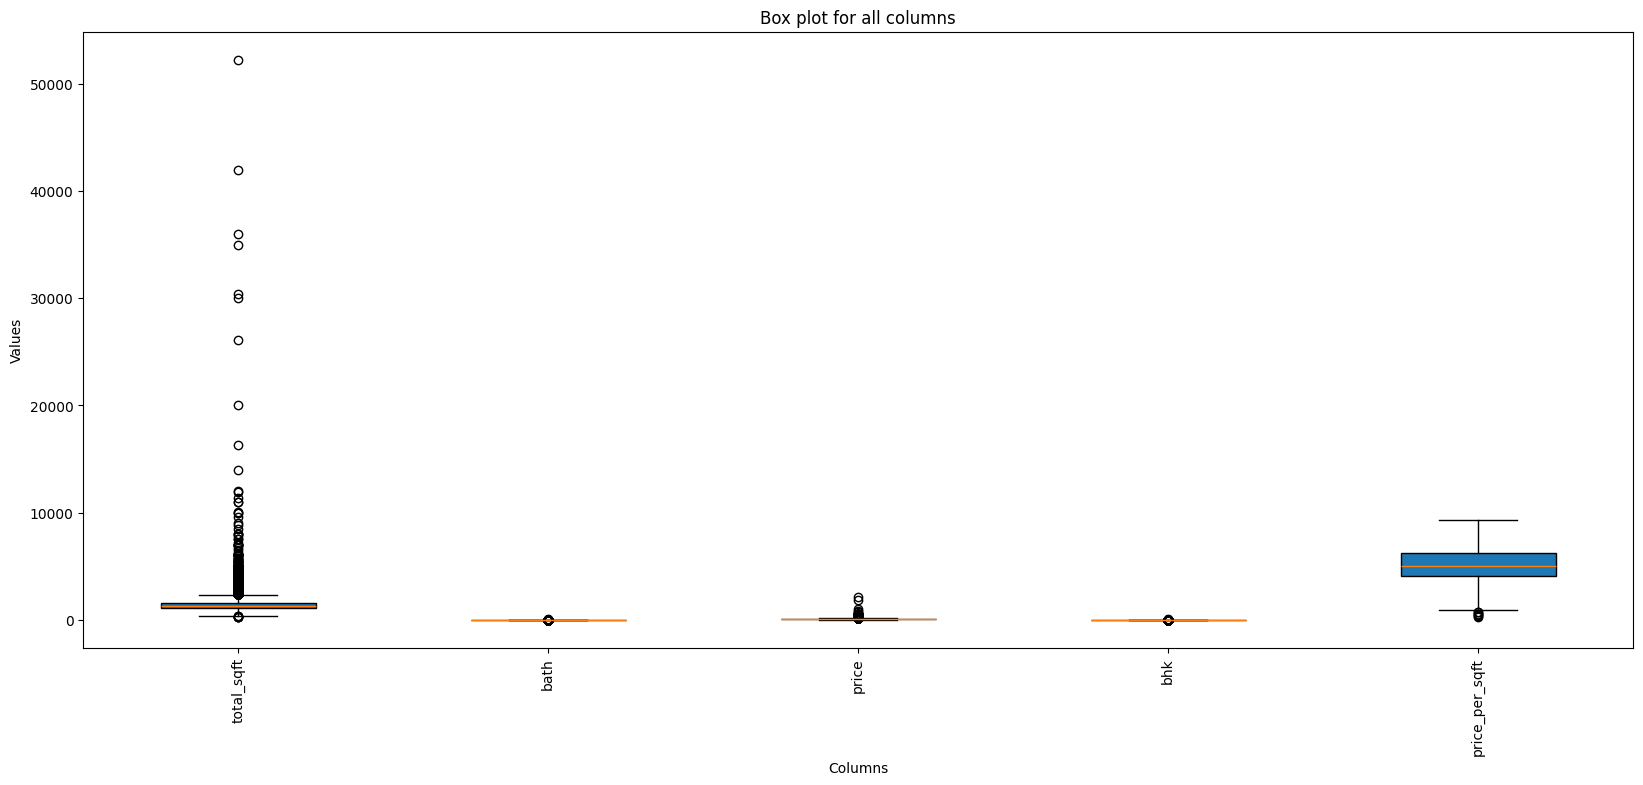

In [71]:
plt.figure(figsize=(20, 8))  # Adjust the figure size as needed
plt.title("Box plot for all columns")
plt.boxplot(dfb.values, patch_artist=True, labels=dfb.columns)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=90)  # Rotate column labels if they overlap
plt.show()

#### Box plot of "price_per_sqft"

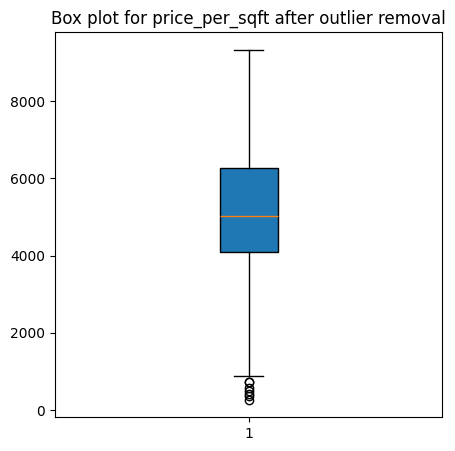

In [80]:
plt.figure(figsize=(5,5))  
plt.title("Box plot for price_per_sqft after outlier removal")
plt.boxplot(dfb["price_per_sqft"], patch_artist=True)
plt.show()

The above given is the box plot of "price_per_sqft". As seen in the figure there is only a few outliers observed. We have used the values after removal of outliers to plot this boxplot